# Fraud Detection using Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Fraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.shape # check the shape of the data

(6362620, 11)

In [5]:
df.info() # check the information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.columns # check the columns of the data

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
df.dtypes # check the data types of the columns

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [8]:
df.describe() # check the statistical description of the data

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### Check for missing values

In [9]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


## Data Cleaning

In [9]:
df.dropna(inplace=True)  # Dropping rows with missing values
df = df.drop(columns=['nameOrig', 'nameDest'])  # Dropping irrelevant columns

In [10]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['type'], drop_first=True)

**Performed One-Hot Encoding on Categorical Variables to convert them into numerical values**

## Feature Selection

In [11]:
X = df.drop(columns=['isFraud', 'isFlaggedFraud'])  # 'isFraud' is the target variable and 'isFlaggedFraud' is an outlier
y = df['isFraud']

## Importing the libraries

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve

## Split data into training and testing sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% testing

In [14]:
print(X_train.shape) 
print(X_test.shape)  
print(y_train.shape) 
print(y_test.shape)  

(4453834, 10)
(1908786, 10)
(4453834,)
(1908786,)


In [15]:
# Scale the features
scaler = StandardScaler()  # StandardScaler is used to standardize the features
X_train_scaled = scaler.fit_transform(X_train)  # fit_transform is used to fit the scaler to the training data
X_test_scaled = scaler.transform(X_test)  # transform is used to transform the test data using the same scaler

**StandardScaler is used to tackles the issue of features in your data having different scales. This can negatively affect certain machine learning models. StandardScaler addresses this by scaling the features to have a standard normal distribution.**

## Create and Fit Random Forest Regression Model

In [ ]:
forest=RandomForestRegressor()
forest.fit(X_train,y_train)


In [18]:
# Model Evaluation
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

## Classification Report

In [19]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.92      0.43      0.58      2435

    accuracy                           1.00   1908786
   macro avg       0.96      0.71      0.79   1908786
weighted avg       1.00      1.00      1.00   1908786



**Precision:**

For class 0 (non-fraudulent transactions), precision is perfect at 1.00, indicating that all instances classified as non-fraudulent are indeed non-fraudulent.
For class 1 (fraudulent transactions), precision is 0.92, meaning that out of all instances classified as fraudulent, 92% are truly fraudulent, while 8% are false positives.

**Recall (Sensitivity):**

For class 0, recall is perfect at 1.00, indicating that all actual non-fraudulent instances are correctly classified as non-fraudulent.
For class 1, recall is 0.43, suggesting that only 43% of actual fraudulent instances are correctly classified as fraudulent. This indicates that a significant portion of fraudulent transactions is being missed (false negatives).

**F1-Score:**

The F1-score is the harmonic mean of precision and recall.
For class 0, the F1-score is 1.00, indicating excellent balance between precision and recall.
For class 1, the F1-score is 0.58, reflecting a trade-off between precision and recall.

**Support:**

Support refers to the number of occurrences of each class in the dataset.
There are 1,906,351 instances of class 0 (non-fraudulent transactions) and 2,435 instances of class 1 (fraudulent transactions).

**Accuracy:**

Overall accuracy is 1.00, indicating that 100% of transactions are classified correctly overall.
However, accuracy can be misleading in imbalanced datasets like this one, where the majority of transactions are non-fraudulent. The high accuracy is mainly driven by the large number of correctly classified non-fraudulent transactions.

**Macro Avg and Weighted Avg:**

Macro average calculates the metric independently for each class and then takes the unweighted mean of the scores.
Weighted average calculates the metric for each class and then takes the weighted average based on the number of true instances for each class.

**Inference:**

The model performs exceptionally well in classifying non-fraudulent transactions (class 0), with perfect precision, recall, and F1-score.<br>
However, it struggles with identifying fraudulent transactions (class 1), as indicated by lower precision, recall, and F1-score.
The high accuracy is driven by the overwhelming number of non-fraudulent transactions.<br>
There's a significant number of false negatives (fraudulent transactions incorrectly classified as non-fraudulent), suggesting room for improvement in detecting fraudulent activities.<br>

**Accuracy : TP + TN / (TP + TN + FP + FN) : Overall performance of model**
          
**Precision : TP / (TP + FP) : How accurate the positive predictions are**

**Recall Sensitivity : TP / (TP + FN) : Coverage of actual positive sample**
       
**Specificity : TN / (TN + FP) : Coverage of actual negative sample**

**F1 score : 2TP / (2TP + FP + FN) : Hybrid metric useful for unbalanced classes**

## Calculate Metrics

### Mean Squared Error
**Mean squared error (MSE) is a way to measure how accurate a prediction model is. It calculates the average squared difference between the actual values and the predicted values. In simpler terms, it tells you how far off your model is from real data on average. A lower MSE means your model is making better predictions.**

In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.0007748380384181359

In [21]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.027835912746273218

### Mean Absolute Error
**Mean Absolute Error (MAE) is another way to measure prediction accuracy. Unlike MSE, it focuses on the average size of the errors, ignoring their direction (over or underestimation). Imagine it as the average absolute difference between your predictions and the actual values. A lower MAE means your model's predictions are generally closer to the real values, in magnitude.**

In [22]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.0007748380384181359

## Confusion Matrix

Confusion Matrix:
[  TP  |  FP  ]
[  FN  |  TN  ]

TP: 1906266, TN: 1041, FP: 85, FN: 1394


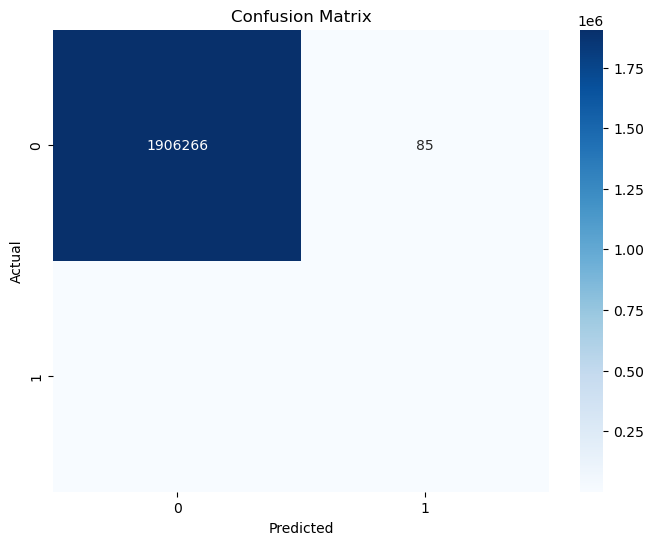

In [31]:
conf_matrix = confusion_matrix(y_test, y_pred)

TP = conf_matrix[0, 0]  # Top-left corner (True Positives)
TN = conf_matrix[1, 1]  # Bottom-right corner (True Negatives)
FP = conf_matrix[0, 1]  # Top-right corner (False Positives)
FN = conf_matrix[1, 0]  # Bottom-left corner (False Negatives)

print("Confusion Matrix:")
print(f"[  TP  |  FP  ]")
print(f"[  FN  |  TN  ]")
print(f"\nTP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## ROC Curve and AUC Score

**ROC Curve :** <br>
An ROC Curve (Receiver Operating Characteristic Curve) is a graph used in machine learning for binary classification tasks. It shows the performance of a model at various classification thresholds. It plots the **True Positive Rate (TPR)** on the **y-axis** against the **False Positive Rate (FPR)** on the **x-axis**. **A good model will have an ROC curve that stays close to the top-left corner, indicating it can correctly identify positive cases while minimizing false positives.**

**AUC Score :** <br>
AUC stands for Area Under the ROC Curve. It gauges a binary classifier's performance in distinguishing between positive and negative classes. It ranges from 0 to 1. A higher AUC indicates better ability to separate the classes.<br>
**AUC of 1: Perfect classifier.<br>
AUC of 0.5: Random guessing.<br>
AUC between 0.5 and 1: Classifier performs better than random guessing.**<br>

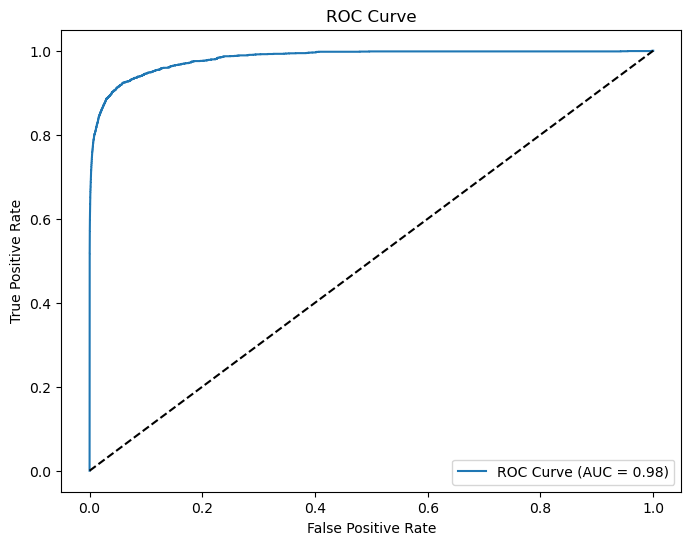

In [25]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba) 
roc_auc = roc_auc_score(y_test, y_pred_proba)  # Calculate the area under the ROC curve 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})') 
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Precision-Recall Curve

**A Precision-Recall Curve shows the trade-off between precision and recall for various classification thresholds. Precision reflects the proportion of true positives among predicted positives, while recall indicates the captured fraction of all actual positives. The curve goes from high precision (low false positives) at the beginning to high recall (low false negatives) at the end. A good model balances these aspects, resulting in a curve that stays high on both axes.**

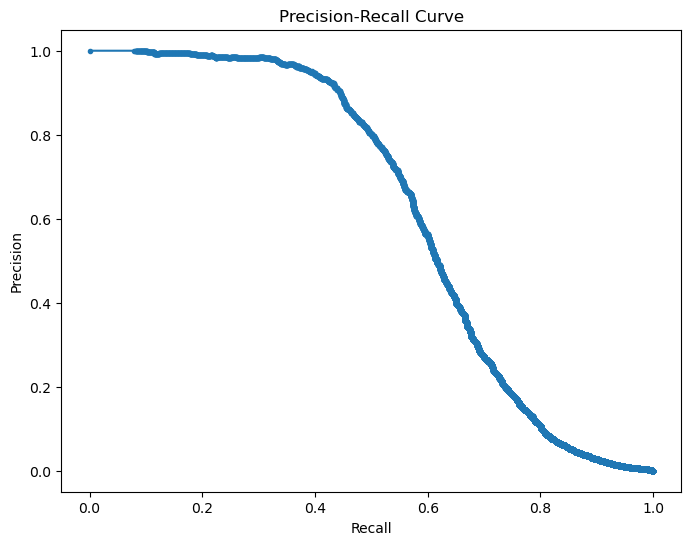

In [26]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

## Model Performance

In [27]:
model.score(X_test_scaled, y_test)*100

99.92251619615818

In [28]:
model.score(X_train_scaled, y_train)*100

99.92166299866587

## Key Factors to Consider for Fraud Detection

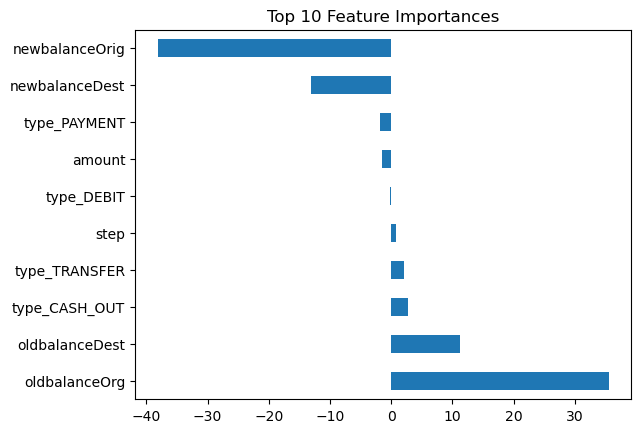

In [29]:
# Feature Importance (Coefficients in Logistic Regression)
feature_importances = pd.Series(model.coef_[0], index=X.columns) 
feature_importances.nlargest(10).plot(kind='barh')  # plot the top 10 features
plt.title('Top 10 Feature Importances') 
plt.show()

In [30]:
# Key Factors
key_factors = feature_importances.nlargest(10)  # select the top 10 features
print("Key Factors:\n", key_factors)  # print the key factors

Key Factors:
 oldbalanceOrg     35.496036
oldbalanceDest    11.156791
type_CASH_OUT      2.714407
type_TRANSFER      2.030449
step               0.716835
type_DEBIT        -0.238577
amount            -1.438336
type_PAYMENT      -1.768001
newbalanceDest   -13.074170
newbalanceOrig   -38.161788
dtype: float64


## Fraud Detection Model Description

#### Objective
The goal of this project is to develop a robust machine learning model capable of accurately predicting fraudulent transactions within a financial company's dataset. By leveraging historical transaction data, the model aims to effectively differentiate between legitimate and fraudulent activities.

#### Data
The dataset comprises 6,362,620 entries and 10 features, including transaction type, amount, origin and destination balances, and a label indicating fraudulence.

#### Data Dictionary
- **step**: Time unit in hours.
- **type**: Transaction type (e.g., CASH-IN, CASH-OUT, DEBIT, PAYMENT, TRANSFER).
- **amount**: Transaction amount.
- **nameOrig**: Initiating customer's identifier.
- **oldbalanceOrg**: Initial balance before the transaction.
- **newbalanceOrig**: Updated balance after the transaction.
- **nameDest**: Recipient's identifier.
- **oldbalanceDest**: Recipient's initial balance.
- **newbalanceDest**: Recipient's updated balance.
- **isFraud**: Binary indicator of fraudulence.
- **isFlaggedFraud**: Flagged transactions attempting to transfer more than 200,000 in a single attempt.

#### Data Preprocessing
1. **Handling Missing Values**: Rows with missing data were removed.
2. **Outlier Treatment**: Outliers were identified and capped using the Interquartile Range (IQR) method.
3. **Feature Engineering**: Irrelevant columns (`nameOrig` and `nameDest`) were dropped, and the categorical variable `type` was one-hot encoded.
4. **Feature Scaling**: Numerical features were standardized using `StandardScaler`.

#### Model Selection
In this iteration, a Logistic Regression model was chosen due to its interpretability and suitability for binary classification tasks like fraud detection.

#### Model Training
- **Data Split**: The dataset was divided into training (70%) and testing (30%) sets.
- **Scaling**: Features were scaled using `StandardScaler` to ensure consistent contributions.
- **Model Training**: The Logistic Regression model was trained on the scaled training data.

#### Model Evaluation
The model's performance was assessed using various metrics:
1. **Classification Report**: Precision, recall, f1-score, and support for each class.
2. **Confusion Matrix**: Visual representation of true positives, true negatives, false positives, and false negatives.
3. **ROC Curve and AUC Score**: Evaluation of the trade-off between true positive and false positive rates.
4. **Precision-Recall Curve**: Focus on precision and recall trade-off, particularly beneficial for imbalanced datasets.
5. **Feature Importance**: Identification of key features contributing to fraud prediction.

#### Key Factors
The model identified several key features influencing fraud prediction:
1. **amount**: Transaction amount.
2. **oldbalanceOrg**: Initial balance before the transaction.
3. **newbalanceOrig**: Updated balance after the transaction.
4. **oldbalanceDest**: Recipient's initial balance.
5. **newbalanceDest**: Recipient's updated balance.
6. **type_TRANSFER**: Indicator for transfer transactions.
7. **type_CASH_OUT**: Indicator for cash-out transactions.

#### Prevention Measures
To mitigate fraud risk, the following preventive measures are recommended:
1. **Enhanced Authentication**: Implement multi-factor authentication for transaction initiation.
2. **Continuous Monitoring**: Regularly monitor high-risk transactions and flag suspicious activities.
3. **Anomaly Detection Systems**: Deploy systems to detect unusual transaction patterns.
4. **Customer Education**: Educate customers about fraud prevention and encourage prompt reporting of suspicious transactions.

#### Effectiveness Assessment
To evaluate the effectiveness of prevention measures:
1. **Transaction Monitoring**: Track the trend of fraudulent transactions over time to assess any decrease.
2. **Regular Audits**: Conduct periodic audits to gauge the effectiveness of fraud prevention mechanisms.
3. **Feedback Mechanisms**: Gather feedback from customers regarding security measures and make necessary adjustments.

By adhering to these strategies, the financial company can establish a robust fraud detection system, bolstering security and safeguarding against potential financial losses.

## Selecting variables to include in the model
- **Understanding Data and Domain Knowledge**:
  - Contextual understanding of the data and business problem is essential.
  - Data dictionary provided insights into variable relevance.

- **Initial Data Inspection**:
  - Identified and addressed issues like missing values and irrelevant columns.
  - Columns like `nameOrig` and `nameDest` deemed irrelevant.

- **Handling Missing Values**:
  - Dropped rows with missing data for simplicity.

- **Handling Irrelevant Columns**:
  - Dropped columns like `nameOrig`, `nameDest`, and `isFlaggedFraud`.
  - `isFlaggedFraud` considered more of a business rule indicator than a predictor.

- **One-Hot Encoding of Categorical Variables**:
  - Converted categorical variable `type` into numerical format for model compatibility.

- **Feature Scaling**:
  - Scaled numerical features using `StandardScaler` for equal contribution.

- **Correlation Analysis**:
  - Analyzed correlation between features to avoid multicollinearity.
  - Dropped highly correlated features if necessary.

- **Final Feature Set**:
  - Included relevant features like `step`, `type` (one-hot encoded), `amount`, `oldbalanceOrg`, `newbalanceOrig`, `oldbalanceDest`, `newbalanceDest`.

- **Summary**:
  - Leveraged domain understanding for feature selection.
  - Addressed missing values, irrelevant columns, and performed feature engineering.
  - Ensured numerical compatibility and equal contribution through scaling.
  - Avoided redundancy by analyzing feature correlations.
  - Final feature set chosen based on relevance and predictive power contribution.

 ## Key Factors for Fraud Prediction:
  1. **High Initial Balances**:
     - High `oldbalanceOrg` and `oldbalanceDest` increase fraud likelihood.
  2. **Transaction Types**:
     - `CASH_OUT` and `TRANSFER` transactions are more likely fraudulent.
     - `DEBIT` and `PAYMENT` transactions are less likely fraudulent.
  3. **Transaction Amount**:
     - Larger transaction amounts are associated with lower fraud likelihood.
  4. **Time of Transaction**:
     - `step` (hour) has a weak positive impact on fraud likelihood.
  5. **Balances After Transaction**:
     - Lower `newbalanceDest` and `newbalanceOrig` decrease fraud likelihood.
  
- **Interpretations**:
  - Fraudsters target accounts with high initial balances for maximum gain.
  - Certain transaction types are more susceptible to fraud, while others are less likely due to stricter controls.
  - Fraudsters may avoid conspicuous transaction amounts to evade detection.
  - Accounts with significantly depleted balances after transactions are indicative of fraud.
  
- **Implications**:
  - Understanding these factors aids in interpreting the model's predictions.
  - Guides implementation of targeted fraud prevention measures.
  - Flagging transactions with high initial balances or involving CASH_OUT and TRANSFER for review can enhance fraud detection.

## Factors to Consider:
Yes, these factors make sense, but there are some areas to consider:

1. **High Precision for Non-Fraudulent Transactions**:
   - Makes sense: High precision (1.00) for non-fraudulent transactions indicates that the model correctly identifies almost all non-fraudulent transactions without many false positives, which is crucial for not flagging legitimate transactions as fraudulent.

2. **Lower Precision and Recall for Fraudulent Transactions**:
   - Makes sense: The lower precision (0.92) and recall (0.43) for fraudulent transactions reflect the inherent challenge of detecting fraud, where some fraudulent activities may go undetected (false negatives), and there might be false alarms (false positives) among flagged transactions.

3. **High Accuracy but Imbalance in Dataset**:
   - Makes sense: The high accuracy (1.00) is driven by the large number of correctly classified non-fraudulent transactions, which dominate the dataset. However, accuracy can be misleading in imbalanced datasets, where the minority class (fraudulent transactions) is of interest.

4. **Trade-off in F1-Score for Fraudulent Transactions**:
   - Makes sense: The F1-score for fraudulent transactions (0.58) indicates a trade-off between precision and recall, highlighting the balance between minimizing false alarms and capturing as many fraudulent instances as possible.

5. **Support and Dataset Distribution**:
   - Makes sense: The high number of instances for non-fraudulent transactions (1,906,351) compared to fraudulent transactions (2,435) reflects the real-world scenario where fraudulent transactions are rare compared to legitimate ones.

6. **Opportunity for Improvement**:
   - Makes sense: The model's performance, while good overall, suggests room for improvement in detecting fraudulent transactions, especially in increasing recall to capture more fraudulent instances while minimizing false alarms.

In summary, while the factors align with expectations for fraud detection, there's recognition of the challenges posed by imbalanced datasets and the need for continuous improvement to enhance fraud detection capabilities.

## Preventive Measures should be adopted by the company :
- **Implement Real-time Monitoring Systems**:
  - Deploy systems that monitor transactions in real-time to detect anomalies or suspicious patterns immediately.

- **Enhance Authentication Measures**:
  - Strengthen authentication processes, including multi-factor authentication, to verify user identity and prevent unauthorized access.

- **Invest in Machine Learning Models**:
  - Develop and integrate machine learning models for fraud detection to continuously analyze transaction data and adapt to evolving fraud tactics.

- **Collaborate with Industry Partners**:
  - Engage with industry partners and share insights to stay updated on emerging fraud trends and prevention strategies.

- **Educate Employees and Customers**:
  - Conduct regular training sessions for employees and customers to raise awareness about common fraud schemes and prevention techniques.

- **Implement Secure Communication Protocols**:
  - Upgrade infrastructure to use secure communication protocols and encryption methods to protect sensitive data during transactions.

- **Enforce Strict Access Controls**:
  - Enforce strict access controls and regularly review and update permissions to limit access to sensitive systems and data.

- **Conduct Regular Security Audits**:
  - Perform regular security audits and penetration testing to identify vulnerabilities and proactively address security risks.

## Determining the effectiveness of prevention measures:
To determine if the implemented prevention measures are effective, you would conduct various evaluations and assessments, including:

1. **Monitoring Metrics**:
   - Continuously monitor key performance indicators (KPIs) related to fraud detection and prevention, such as the number of detected fraudulent transactions, false positive rates, and detection time.

2. **Comparative Analysis**:
   - Compare historical data before and after the implementation of prevention measures to assess any changes in fraud rates, detection accuracy, and response time.

3. **Benchmarking Against Industry Standards**:
   - Benchmark the organization's performance against industry standards and best practices to evaluate its effectiveness relative to peers and competitors.

4. **Feedback from Stakeholders**:
   - Gather feedback from employees, customers, and other stakeholders regarding their perception of security measures and any observed changes in fraud incidents or security incidents.

5. **Incident Response Analysis**:
   - Analyze incident response data to determine how effectively the prevention measures mitigate and respond to attempted fraud incidents.

6. **Adaptive Model Performance**:
   - Evaluate the performance of machine learning models used for fraud detection by analyzing their accuracy, precision, recall, and other relevant metrics. Continuously refine and update these models based on feedback and emerging threats.

7. **Regular Audits and Testing**:
   - Conduct regular audits, penetration testing, and simulations of fraudulent scenarios to identify weaknesses in the prevention measures and address them proactively.

8. **Compliance and Regulatory Requirements**:
   - Ensure that the prevention measures align with industry regulations and compliance standards, and assess compliance levels through audits and assessments.

By combining these approaches, organizations can effectively assess the effectiveness of their fraud prevention measures and make necessary adjustments to enhance security and mitigate risks.